In [2]:
import tensorflow as tf

In [3]:
X = tf.range(0, 100, 2)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98],
      dtype=int32)>

In [4]:
y = 2*X + 3
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([  3,   7,  11,  15,  19,  23,  27,  31,  35,  39,  43,  47,  51,
        55,  59,  63,  67,  71,  75,  79,  83,  87,  91,  95,  99, 103,
       107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199], dtype=int32)>

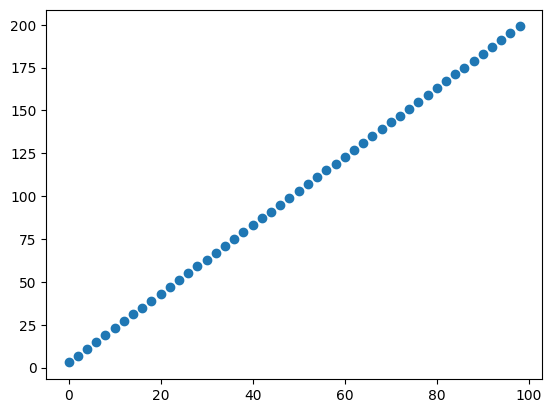

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

# Model Building

In [6]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(0.01),
             metrics = ['mae'])

In [8]:
# train the model
model.fit(X, y, epochs=50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 127.0891 - mae: 127.0891 
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 124.3539 - mae: 124.3539 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 113.7486 - mae: 113.7486 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 110.4418 - mae: 110.4418 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 102.9867 - mae: 102.9867
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 100.7891 - mae: 100.7891 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 96.7144 - mae: 96.7144   
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 86.3680 - mae: 86.3680 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 81.7756 - mae: 81.7756 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 76.4030 - mae: 76.4030 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 70.5056 - mae: 70.5056 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 65.3917 - mae: 65.3917 
Epoch 13/50
2/2 ━━━━━━

In [9]:
X_val = 150
2*X_val + 3

303

In [10]:
X_val = -10
2*X_val + 3

-17

In [11]:
import numpy as np

# Convert input to a NumPy array
prediction = model.predict(np.array([150]))
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[303.4725]]



# Save model using SavedModel format

In [22]:
model.save("new_model_1.keras")


# Save model using HDF5 format

In [23]:
model.save("new_model_2.h5")

# Using SavedModel format

In [24]:
# Load the saved model
new_model_1 = tf.keras.models.load_model("new_model_1.keras")

# Check if the model loaded correctly
new_model_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64 (260.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33 (136.00 B)

# Using HDF5 format

In [26]:
# Load the saved model
new_model_2 = tf.keras.models.load_model("new_model_2.h5")

# Check the model structure
new_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [27]:
input_data = np.array([[150], [-10]])  # Shape: (2, 1)

# Make predictions
predictions = new_model_2.predict(input_data)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[303.4725 ]
 [-17.91907]]
